Image credits: [BruceBlaus](https://commons.wikimedia.org/wiki/User:BruceBlaus) under [CC BY 3.0](https://creativecommons.org/licenses/by/3.0/deed.en) via [Wikimedia Commons](https://commons.wikimedia.org/wiki/File:Blausen_0657_MultipolarNeuron.png).

Python source: [451-blog/perceptron.py at main · doabell/451-blog](https://github.com/doabell/451-blog/blob/main/posts/perceptron/perceptron.py)

Instructions can be found at [Implementing the Perceptron Algorithm](https://middlebury-csci-0451.github.io/CSCI-0451/assignments/blog-posts/blog-post-perceptron.html).

## Experiments
### Linearly separable data

Through trial and error, we generate some linearly separable data and test the perceptron algorithm on it.

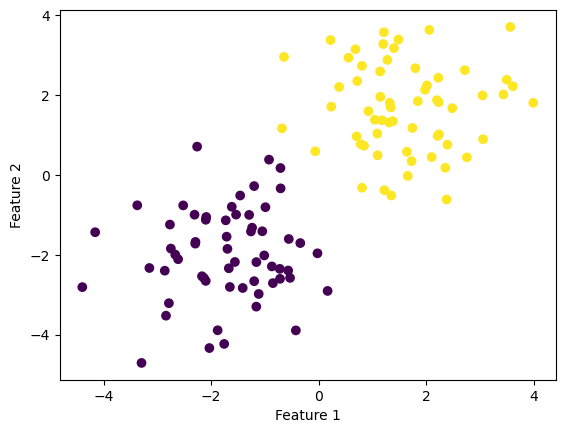

In [1]:
# Data
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
np.random.seed(283)

n = 120
p_features = 3

X, y = make_blobs(
    n_samples=n,
    n_features=p_features - 1,
    centers=[(-1.7, -1.7), (1.7, 1.7)]
)

fig = plt.scatter(X[:, 0], X[:, 1], c=y)
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")


There is a clear line that separates the two blobs here.

Let us find out if our perceptron algorithm can find that line.

First, we fit the algorithm with at most 1000 steps:

In [2]:
# Algorithm
from perceptron import Perceptron

p = Perceptron()
p.fit(X, y, max_steps=1000)


Then, we can visualize the accuracy of each iteration:

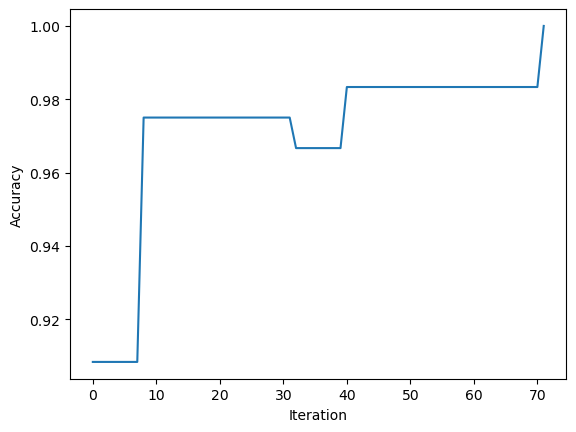

In [3]:
# score history
fig = plt.plot(p.history)
xlab = plt.xlabel("Iteration")
ylab = plt.ylabel("Accuracy")


We can see that for this example, $w$ only changed 4 times.

Then the model reached 100% accuracy and stopped running.

We can then visualize the dividing line found by the perceptron:

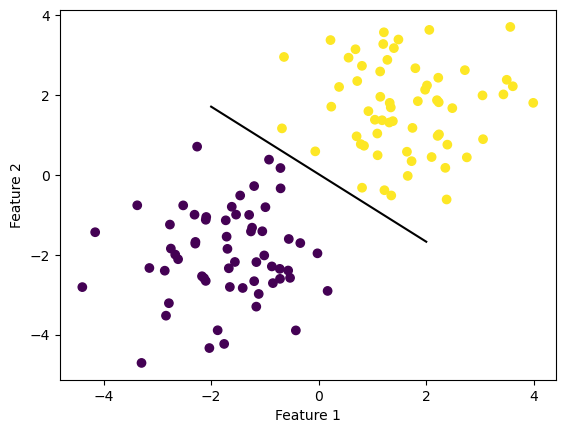

In [4]:
# visualize
def draw_line(w, x_min, x_max):
    x = np.linspace(x_min, x_max, 101)
    y = -(w[0]*x + w[2])/w[1]
    plt.plot(x, y, color="black")


fig = plt.scatter(X[:, 0], X[:, 1], c=y)
fig = draw_line(p.w, -2, 2)

xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")


In [5]:
# score, should be 1
p.score(X, y)

1.0

That line divided the two blobs right in the middle, resulting in a 1.0 accuracy.
Not bad!

### Not linearly separable
Next, we consider 2-d data that is not linearly separable.

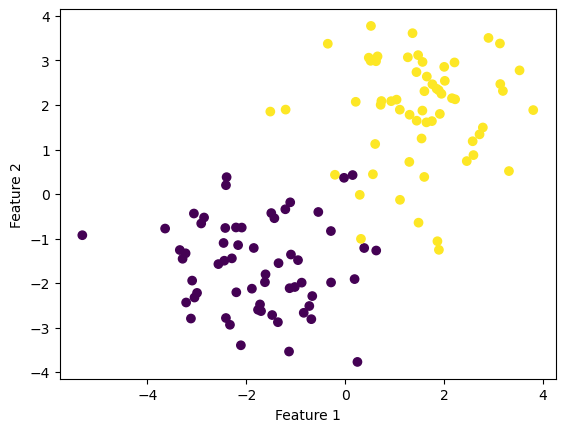

In [6]:
np.random.seed(227)

n = 120
p_features = 3

X, y = make_blobs(
    n_samples=n,
    n_features=p_features - 1,
    centers=[(-1.7, -1.7), (1.7, 1.7)]
)

fig = plt.scatter(X[:, 0], X[:, 1], c=y)
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

The dividing line should be at about the same position, but now the two blobs overlap with each other.

Let us observe whether the perceptron algorithm still manages to find that line.

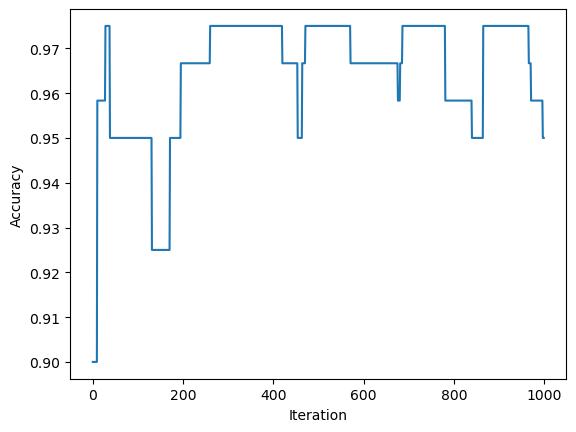

In [7]:
# Algorithm
p = Perceptron()
p.fit(X, y, max_steps=1000)

# score history
fig = plt.plot(p.history)
xlab = plt.xlabel("Iteration")
ylab = plt.ylabel("Accuracy")

We can see that given data that is not linearly separable, $w$ does not converge.

Instead, the algorithm iterates the full 1000 iterations, and accuracy fluctuates between around 0.95 and 0.97.

This is expected, because there is no line that perfectly separates these two blobs.

As for the dividing line:

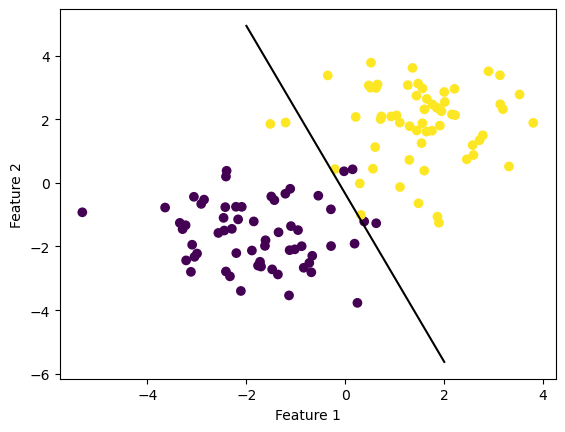

In [8]:
# visualize
def draw_line(w, x_min, x_max):
    x = np.linspace(x_min, x_max, 101)
    y = -(w[0]*x + w[2])/w[1]
    plt.plot(x, y, color="black")


fig = plt.scatter(X[:, 0], X[:, 1], c=y)
fig = draw_line(p.w, -2, 2)

xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

In [9]:
# score, should not be 1
p.score(X, y)

0.95

At the cost of ~6 misclassified data points, the algorithm yielded an accuracy of 0.95.
Good enough.

### Higher dimensions
Finally, we increase the number of features to reach higher dimensions.

Visualization will be vard beyond 3-d, so we will instead look at the score history during training only.

We will be using 8 features (including $y$) and 1500 data points.

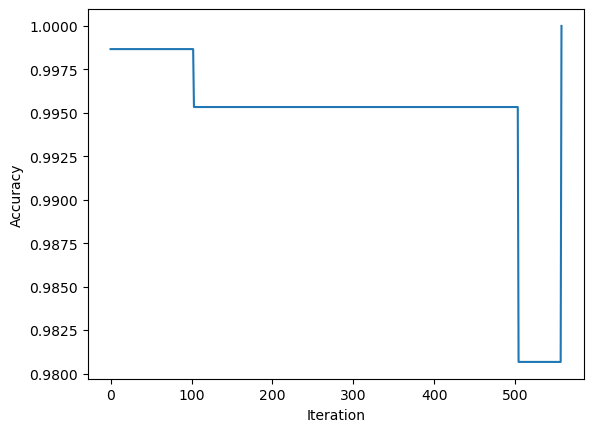

In [10]:
np.random.seed(149)

n = 1500
p_features = 7

# make centers with correct dimensions
c1 = np.empty(p_features - 1);
c1.fill(-1.5)

c2 = np.empty(p_features - 1);
c2.fill(1.5)

X, y = make_blobs(
    n_samples=n,
    n_features=p_features - 1,
    centers=[c1, c2]
)

# Algorithm
p = Perceptron()
p.fit(X, y, max_steps=1000)

# score history
fig = plt.plot(p.history)
xlab = plt.xlabel("Iteration")
ylab = plt.ylabel("Accuracy")

In [11]:
# score
p.score(X, y)

1.0

On this dataset, our perceptron algorithm reached 100% accuracy!

As for the accuracy during model fitting, the process took more than 500 iterations, but ended up achieving a perfect score at the end.

Because our perceptron converged, we can say that this particular dataset **is linearly separable**.

## Note on complexity

> What is the runtime complexity of a single iteration of the perceptron algorithm update as described by [Equation 1](https://middlebury-csci-0451.github.io/CSCI-0451/assignments/blog-posts/blog-post-perceptron.html#eq-perceptron-update)?
> Assume that the relevant operations are addition and multiplication.
> Does the runtime complexity depend on the number of data points $n$? What about the number of features $p$?

The relevant line is [Line 52](https://github.com/doabell/451-blog/blob/main/posts/perceptron/perceptron.py#L52) in `perceptron.py`:

```python
self.w = self.w + ((y_[i] * self.w @ X_[i]) < 0) * y_[i] * X_[i]
```

We can use `numpy.ndarray.shape` to find out the shape of these variables involved.

In [21]:
# From line 39
X_ = np.append(X, np.ones((X.shape[0], 1)), 1)

print(f"Shape of self.w is {p.w.shape}")
print(f"Shape of y_[i] is {y[0].shape}")
print(f"Shape of X_[i] is {X_[0].shape}")


Shape of self.w is (7,)
Shape of y_[i] is ()
Shape of X_[i] is (7,)


We can see that `self.w` and `X_[i]` have length $p$, while `y[i]` is a single integer.

Therefore, the runtime complexity is $O(p)$ and does not depend on the number of data points $n$.

By intuition, we do not have to look at all the data points when updating `self.w`.
We only need to do that when determining the score, but that is elsewhere in the function and not described by [Equation 1](https://middlebury-csci-0451.github.io/CSCI-0451/assignments/blog-posts/blog-post-perceptron.html#eq-perceptron-update).